In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
data_df = pd.read_csv('2021VAERSDATA.csv', encoding='latin1', low_memory=False)

symp_df = pd.read_csv('2021VAERSSYMPTOMS.csv', encoding='latin1', low_memory=False)

vax_df = pd.read_csv('2021VAERSVAX.csv', encoding='latin1', low_memory=False)

- **ASSESSING DATA**

In [3]:
data_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [4]:
symp_df.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,910642,Dyspnoea,25.0,Heart rate increased,25.0,SARS-CoV-2 test negative,25.0,NaN,NaN,NaN,NaN
1,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
3,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
4,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN


In [5]:
vax_df.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,910642,COVID19,PFIZER\BIONTECH,EJ1685,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
2,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
3,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))


In [6]:
# view shape of the three datasets
data_df.shape, symp_df.shape, vax_df.shape

((736914, 35), (983426, 11), (780582, 8))

In [7]:
vax_df.VAX_TYPE.value_counts()

COVID19    725598
VARZOS      14295
UNK          9722
FLU4         5381
HPV9         1826
            ...  
DTPHEP          1
PER             1
MNQHIB          1
TDAPIPV         1
H5N1            1
Name: VAX_TYPE, Length: 69, dtype: int64

- **GETTING DATA FOR ONLY VACCINES RELATED TO COVID19**

In [6]:
# filter covid vaccine data
vax_covid = vax_df.query("VAX_TYPE == 'COVID19'")
vax_covid.head(10)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,910642,COVID19,PFIZER\BIONTECH,EJ1685,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
2,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
3,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
5,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
7,916606,COVID19,MODERNA,011J20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
8,916607,COVID19,MODERNA,NaN,UNK,IM,LA,COVID19 (COVID19 (MODERNA))
9,916608,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
10,916609,COVID19,MODERNA,011J201A,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [9]:
print(vax_covid.VAX_MANU.value_counts())

print(vax_covid.VAX_NAME.value_counts())

MODERNA                 335838
PFIZER\BIONTECH         325148
JANSSEN                  63024
UNKNOWN MANUFACTURER      1588
Name: VAX_MANU, dtype: int64
COVID19 (COVID19 (MODERNA))            335838
COVID19 (COVID19 (PFIZER-BIONTECH))    325148
COVID19 (COVID19 (JANSSEN))             63024
COVID19 (COVID19 (UNKNOWN))              1588
Name: VAX_NAME, dtype: int64


- **MERGING THE THREE DATASETS**

In [7]:
# merge datasets
covid_df=pd.merge(data_df, pd.merge(symp_df, vax_covid,on='VAERS_ID',how='inner'),on='VAERS_ID',how='right')
# view
covid_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,910642,01/04/2021,CO,47.0,NaN,NaN,F,NaN,Shortness of breath; Fast heart rate with just...,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EJ1685,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
2,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
3,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,23.1,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))


In [11]:
covid_df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME'],
      dtype='object')

In [12]:
covid_df.shape

(982333, 52)

- **DEALING WITH MISSING VALUES**

In [8]:
# check percent of missing values
(covid_df.isnull().sum()*100 / covid_df.isnull().count()).sort_values(ascending=False)

ER_VISIT           99.986970
RPT_DATE           99.935460
X_STAY             99.929657
V_FUNDBY           99.928028
BIRTH_DEFECT       99.916220
CAGE_MO            99.844859
DATEDIED           98.223922
DIED               98.074991
L_THREAT           97.443739
DISABLE            97.437223
PRIOR_VAX          94.438749
HOSPDAYS           92.104918
HOSPITAL           89.053407
ER_ED_VISIT        83.577972
OFC_VISIT          76.938167
SPLTTYPE           72.806574
SYMPTOMVERSION5    65.161101
SYMPTOM5           65.161101
SYMPTOM4           53.812607
SYMPTOMVERSION4    53.812607
LAB_DATA           53.258213
CUR_ILL            50.918273
ALLERGIES          44.824006
SYMPTOM3           39.668626
SYMPTOMVERSION3    39.668626
OTHER_MEDS         37.755221
HISTORY            34.133639
VAX_LOT            28.917994
VAX_SITE           24.626578
VAX_ROUTE          22.323693
SYMPTOM2           21.840659
SYMPTOMVERSION2    21.840659
CAGE_YR            17.593728
STATE              11.005331
NUMDAYS       

In [9]:
# drop columns with above 70% NaNs
covid_df.drop(["ER_VISIT","RPT_DATE","X_STAY","V_FUNDBY","BIRTH_DEFECT","CAGE_MO","DATEDIED","DIED","L_THREAT","DISABLE",
               "PRIOR_VAX","HOSPDAYS","HOSPITAL","ER_ED_VISIT","OFC_VISIT","SPLTTYPE"], axis=1, inplace=True)

In [10]:
# drop extraneous columns (having lot of textual/irrelevant data)
covid_df.drop(["HISTORY","SYMPTOM_TEXT","LAB_DATA","OTHER_MEDS","CUR_ILL","ALLERGIES","TODAYS_DATE"], axis=1, inplace=True)

In [11]:
covid_df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'V_ADMINBY', 'FORM_VERS',
       'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2',
       'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4',
       'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [18]:
covid_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,...,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,910642,01/04/2021,CO,47.0,NaN,F,Y,12/18/2020,12/20/2020,2.0,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EJ1685,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,916600,01/01/2021,TX,33.0,33.0,F,Y,12/28/2020,12/30/2020,2.0,...,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
2,916601,01/01/2021,CA,73.0,73.0,F,Y,12/31/2020,12/31/2020,0.0,...,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
3,916602,01/01/2021,WA,23.0,23.0,F,U,12/31/2020,12/31/2020,0.0,...,23.1,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916603,01/01/2021,WA,58.0,58.0,F,Y,12/23/2020,12/23/2020,0.0,...,NaN,NaN,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))


In [ ]:
# drop rows with missing values drastically reduced the count
# first copy data to prectice
#pract = covid_df.copy()

In [19]:
covid_df.shape

(982333, 29)

- **Handling duplicates**

In [12]:
covid_df[covid_df.duplicated(keep="first")]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,...,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3264,919453,01/04/2021,CA,49.0,49.0,F,N,12/29/2020,12/30/2020,1.0,...,23.1,Rash papular,23.1,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3266,919453,01/04/2021,CA,49.0,49.0,F,N,12/29/2020,12/30/2020,1.0,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4603,920671,01/05/2021,AZ,62.0,62.0,F,N,12/23/2020,01/05/2021,13.0,...,NaN,NaN,NaN,COVID19,MODERNA,NaN,1,SYR,LA,COVID19 (COVID19 (MODERNA))
8128,923893,01/06/2021,LA,73.0,62.0,F,U,12/30/2020,12/30/2020,0.0,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EL0142,1,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
17488,932017,01/09/2021,IN,62.0,62.0,F,U,01/09/2021,01/09/2021,0.0,...,24.0,Hypertension,24.0,COVID19,MODERNA,026L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981063,2013754,04/23/2021,NaN,58.0,58.0,U,N,03/16/2021,03/16/2021,0.0,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
981163,2042664,04/16/2021,NaN,70.0,70.0,F,NaN,02/03/2021,03/17/2021,42.0,...,24.1,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,AR,COVID19 (COVID19 (MODERNA))
981264,2046298,04/18/2021,NaN,51.0,51.0,F,NaN,01/06/2021,02/17/2021,42.0,...,24.1,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,AR,COVID19 (COVID19 (MODERNA))
981303,2046327,04/15/2021,NaN,30.0,30.0,U,N,02/22/2021,04/06/2021,43.0,...,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,AR,COVID19 (COVID19 (MODERNA))


In [13]:
covid_df.drop_duplicates(keep="first", inplace=True)

In [14]:
covid_df.shape

(980486, 29)

#### ANALYSIS AND VISUALIZATION

In [23]:
# view descriptive statistics of categorical columns
covid_df.describe(include=[object])

,RECVDATE,STATE,SEX,RECOVD,VAX_DATE,ONSET_DATE,V_ADMINBY,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
count,980486,872921,980486,894324,924989,916829,980486,980486,766501,591709,452953,341636,980486,980486,697379,976392,761966,739347,980486
unique,365,64,3,3,1327,800,9,7421,7062,6579,6018,5551,1,4,29911,8,9,11,4
top,08/22/2021,CA,F,N,04/01/2021,04/01/2021,UNK,Chills,Headache,Headache,Pyrexia,Pyrexia,COVID19,MODERNA,Unknown,1,IM,LA,COVID19 (COVID19 (MODERNA))
freq,18374,93811,666060,383194,12732,14340,267527,51009,35612,31597,23947,21751,980486,447525,11664,480419,440737,515481,447525


> - ***Count of Vaccine Brands***

In [24]:
covid_df.VAX_MANU.value_counts()

MODERNA                 447525
PFIZER\BIONTECH         441054
JANSSEN                  89740
UNKNOWN MANUFACTURER      2167
Name: VAX_MANU, dtype: int64

Text(0.5, 0, 'Vaccine Brand')

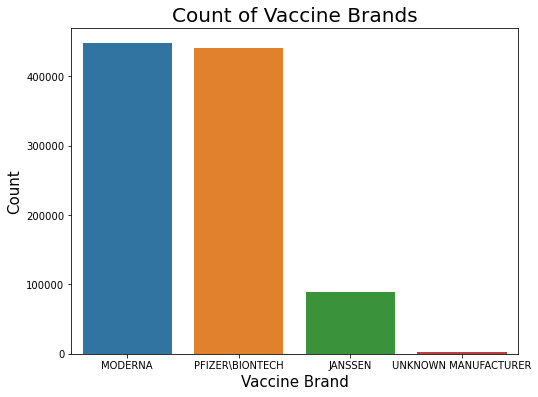

In [15]:
# plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=covid_df, x='VAX_MANU', order= covid_df.VAX_MANU.value_counts().index)
# sns.set_style("darkgrid")
plt.title('Count of Vaccine Brands', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Vaccine Brand', fontsize=15)

> - **Count of Vaccine Route**

<AxesSubplot:xlabel='VAX_ROUTE', ylabel='count'>

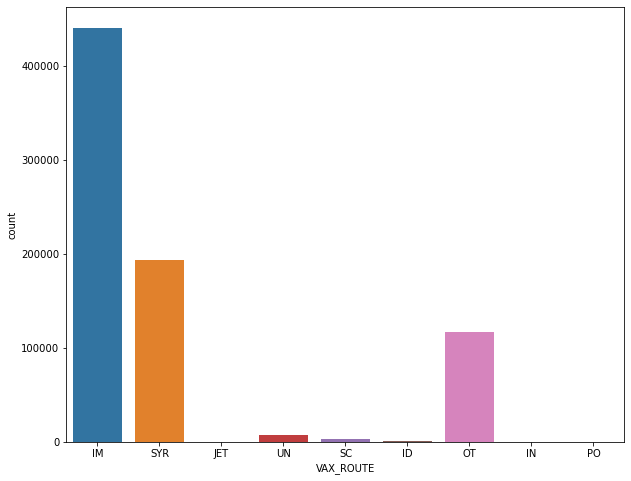

In [48]:
sns.countplot(data=covid_df, x='VAX_ROUTE')

> - **Common symptoms associated with each brand**

In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [17]:
# filter each brand
moderna = covid_df.query('VAX_MANU == "MODERNA"')
pfizer = covid_df.query('VAX_MANU == "PFIZER\BIONTECH"')
janssen = covid_df.query('VAX_MANU == "JANSSEN"')
others = covid_df.query('VAX_MANU == "UNKNOWN MANUFACTURER"')

In [18]:
# get top 30 most frequent symptoms for moderna
m_ind = np.r_[moderna.index]

modernas=[]
for i in m_ind:
    modernas+=[moderna.loc[i,"SYMPTOM1"]]
    modernas+=[moderna.loc[i,"SYMPTOM2"]]
    modernas+=[moderna.loc[i,"SYMPTOM3"]]
    modernas+=[moderna.loc[i,"SYMPTOM4"]]
    modernas+=[moderna.loc[i,"SYMPTOM5"]]

moderna_df=pd.DataFrame(modernas)
mod_30 = moderna_df.value_counts()[0:30]

Text(0.5, 1.0, 'MODERNA')

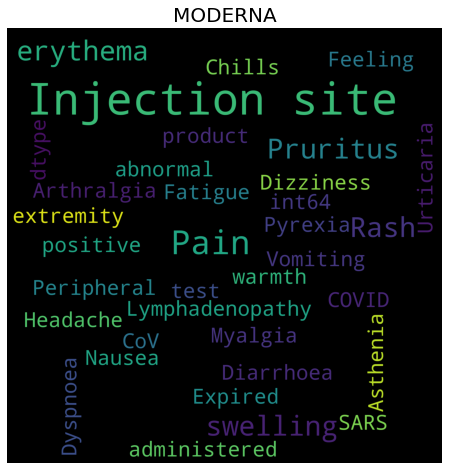

In [32]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = set(list(STOPWORDS) + ['|']),background_color = 'black',
                      height =2000,
                      width = 2000
                     ).generate(str(mod_30))
plt.rcParams['figure.figsize'] = (10,8)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("MODERNA", fontsize=20)

In [30]:
# get top 30 most frequent symptoms for pfizer
p_ind = np.r_[pfizer.index]

pfizers=[]
for i in p_ind:
    pfizers+=[pfizer.loc[i,"SYMPTOM1"]]
    pfizers+=[pfizer.loc[i,"SYMPTOM2"]]
    pfizers+=[pfizer.loc[i,"SYMPTOM3"]]
    pfizers+=[pfizer.loc[i,"SYMPTOM4"]]
    pfizers+=[pfizer.loc[i,"SYMPTOM5"]]

pfizer_df=pd.DataFrame(pfizers)
pfi_30 = pfizer_df.value_counts()[0:30]

Text(0.5, 1.0, 'PFIZER')

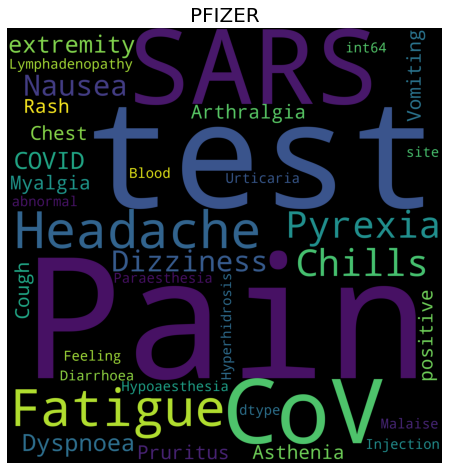

In [33]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = set(list(STOPWORDS) + ['|']),background_color = 'black',
                      height =2000,
                      width = 2000
                     ).generate(str(pfi_30))
plt.rcParams['figure.figsize'] = (10,8)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("PFIZER", fontsize=20)

In [35]:
# get top 30 most frequent symptoms for Janssen
j_ind = np.r_[janssen.index]

janssens=[]
for i in j_ind:
    janssens+=[janssen.loc[i,"SYMPTOM1"]]
    janssens+=[janssen.loc[i,"SYMPTOM2"]]
    janssens+=[janssen.loc[i,"SYMPTOM3"]]
    janssens+=[janssen.loc[i,"SYMPTOM4"]]
    janssens+=[janssen.loc[i,"SYMPTOM5"]]

janssen_df=pd.DataFrame(janssens)
jan_30 = janssen_df.value_counts()[0:30]

Text(0.5, 1.0, 'JANSSEN')

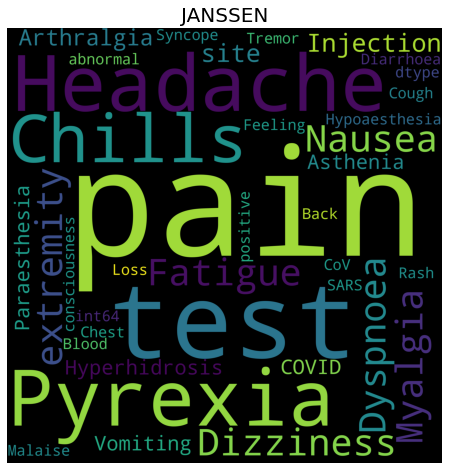

In [36]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = set(list(STOPWORDS) + ['|']),background_color = 'black',
                      height =2000,
                      width = 2000
                     ).generate(str(jan_30))
plt.rcParams['figure.figsize'] = (10,8)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("JANSSEN", fontsize=20)



> - **Comparison of symptoms recovery by vaccine brand**

Text(0.5, 1.0, 'RECOVERY COUNT PER VACCINE BRAND')

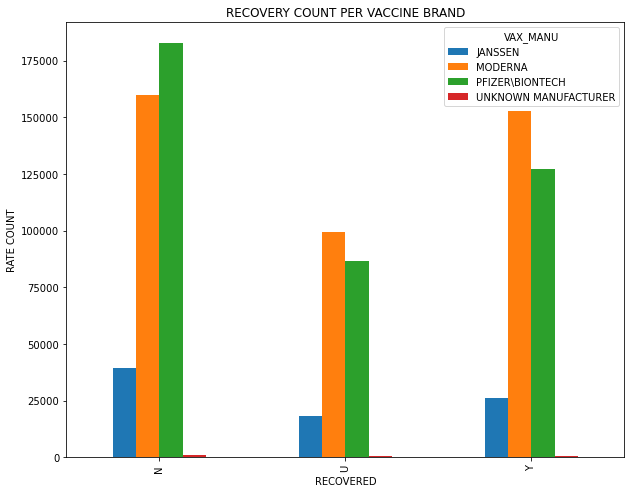

In [97]:
plt.rcParams['figure.figsize'] = (10,8)
pd.crosstab(covid_df["RECOVD"],covid_df["VAX_MANU"]).plot(kind='bar')
plt.xlabel('RECOVERED')
plt.ylabel('RATE COUNT')
plt.title('RECOVERY COUNT PER VACCINE BRAND')

> - **Comparison of symptoms recovery by gender**

Text(0.5, 1.0, 'RECOVERY COUNT PER GENDER')

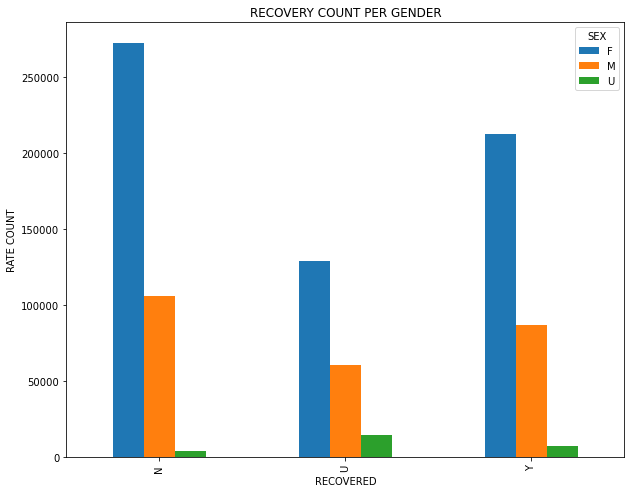

In [99]:
plt.rcParams['figure.figsize'] = (10,8)
pd.crosstab(covid_df["RECOVD"],covid_df["SEX"]).plot(kind='bar')
plt.xlabel('RECOVERED')
plt.ylabel('RATE COUNT')
plt.title('RECOVERY COUNT PER GENDER')

In [144]:
# view descriptive statistics of numeric columns
covid_df.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,NUMDAYS,FORM_VERS,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5
count,9.804860e+05,902197.000000,807700.000000,878859.000000,980486.000000,980486.000000,766501.000000,591709.000000,452953.000000,341636.000000
mean,1.412831e+06,49.992121,49.695277,32.151966,1.999282,23.957793,23.957425,23.956455,23.958975,23.959943
std,3.106019e+05,18.943221,19.123631,595.608482,0.026786,0.242797,0.242814,0.243802,0.241318,0.242157
min,9.106420e+05,0.080000,0.000000,0.000000,1.000000,23.100000,23.100000,23.100000,23.100000,23.100000
25%,1.146343e+06,35.000000,35.000000,0.000000,2.000000,24.000000,24.000000,24.000000,24.000000,24.000000
50%,1.376332e+06,50.000000,50.000000,1.000000,2.000000,24.000000,24.000000,24.000000,24.000000,24.000000
75%,1.674771e+06,65.000000,65.000000,7.000000,2.000000,24.000000,24.000000,24.000000,24.000000,24.000000
max,2.247797e+06,119.000000,120.000000,44224.000000,2.000000,25.000000,25.000000,25.000000,25.000000,25.000000


> - **Distribution of Participant Age**

<AxesSubplot:title={'center':'Distibution of Participant Age'}, xlabel='AGE_YRS', ylabel='Count'>

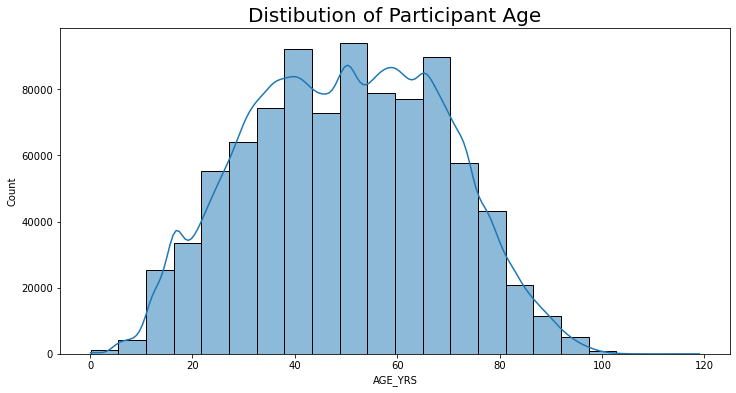

In [59]:
plt.figure(figsize=(12,6))
plt.title('Distibution of Participant Age', fontsize=20)
sns.histplot(data=covid_df, x='AGE_YRS', bins=22, kde=True)

> - **Distribution of NUMDAYS**

(0.0, 500.0)

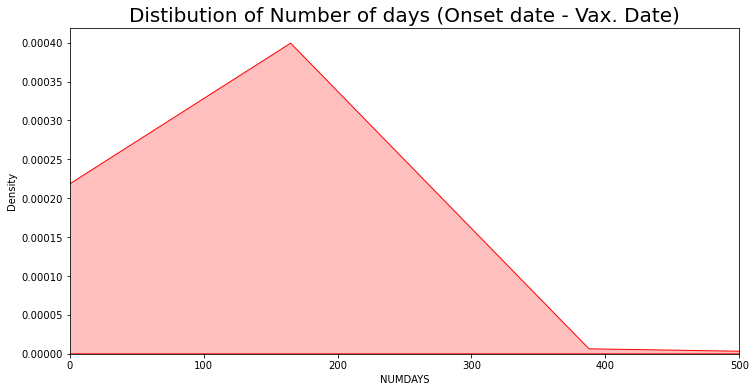

In [60]:
plt.figure(figsize = (12,6))
sns.kdeplot(covid_df.NUMDAYS, shade=True, color='red', bw_adjust=0.5)
plt.title('Distibution of Number of days (Onset date - Vax. Date)', fontsize=20)
plt.ylabel('Density')
plt.xlabel('NUMDAYS')
plt.xlim(0,500)